In [36]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
df = pd.read_csv("IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [25]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [26]:
texts = df['review'].values
labels = df['sentiment'].astype(int).values

In [27]:
num_words = 10000  # use top 10,000 words
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)


In [28]:
maxlen = 500
data = pad_sequences(sequences, maxlen=maxlen)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [30]:

model = Sequential([
    Embedding(input_dim=num_words, output_dim=32, input_length=maxlen),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
history=model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.7281 - loss: 0.5026 - val_accuracy: 0.8817 - val_loss: 0.2868
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - accuracy: 0.9554 - loss: 0.1326 - val_accuracy: 0.8649 - val_loss: 0.3395
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9931 - loss: 0.0286 - val_accuracy: 0.8577 - val_loss: 0.4691
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9997 - loss: 0.0053 - val_accuracy: 0.8669 - val_loss: 0.5153
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 1.0000 - loss: 8.8369e-04 - val_accuracy: 0.8704 - val_loss: 0.5513


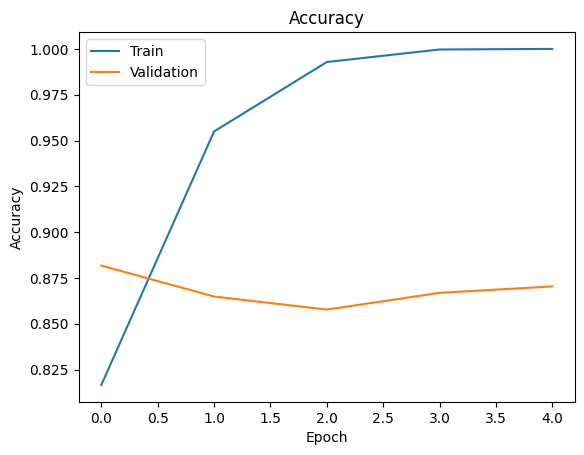

In [37]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend(),plt.title('Accuracy'),plt.xlabel('Epoch'),plt.ylabel('Accuracy')
plt.show()

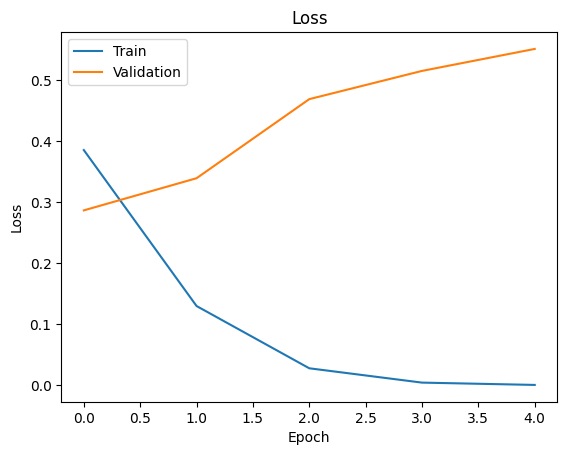

In [40]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Validation')
plt.legend(),plt.title('Loss'),plt.xlabel('Epoch'),plt.ylabel('Loss')
plt.show()

In [38]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8671 - loss: 0.5265
Test Accuracy: 0.87
